# Programming Exercise Week 2

Now that you know the ABCs of using PuLP to solve linear programs, try it with the following two problems you have seen in the exercise class last week to practice even more.

<font color='blue'><b>Goals of this notebook:</b></font>

1. Work with a basic LP in PuLP: create a model, modify it, determine if it is feasible.
1. Plot the feasible region of an LP using `matplotlib`.

## Exercise 1: The Easternmost Point of the House

In problem set 1 exercise 2, we saw the optimization problem involving a house and a lodge. The goal was to minimize the Euclidean distance between them. However, that problem is **NOT** a linear program. Can you identify the nonlinear part in the solution of this exercise?

We thus change the program to find the easternmost (rightmost) point in the house, which is a linear problem. Here is the model of our problem:

$$
\begin{array}{rlcl}
\text{maximize:} & x	\\
\text{subject to:} & 2x+5y &\leq& 54, \\
                   & 8x+y  &\geq& 26,\\
                   & y     &\geq& 2,\\
                   & 2x+y  &\leq& 22.
\end{array}
$$

Let's do it using PuLP following the steps in the introductory notebook. As this is your first time using PuLP, we have created a skeleton of the code for you. You only need to fill in the blanks marked with `'???'`.

### Task 1: Write a linear program to represent the problem above.

#### Step 1: Importing PuLP

In [1]:
# Import PuLP
from pulp import *

#### Step 2: Creating an empty linear program

In [3]:
# Create an empty linear program
my_LP = LpProblem("Easternmost_point_of_the_house", LpMaximize)

#### Step 3: Adding the variables
In this problem, we wish to represent the feasible region of the house. A natural way to do so is to assign two variables for the two coordinates of the x-y plane.

In [4]:
# x: x-coordinate; y: y-coordinate
x = LpVariable("x-component", lowBound=0)
y = LpVariable("y-component", lowBound=0)

#### Step 4: Adding the objective function

In [5]:
# Find the right-most point of the house
my_LP += x

#### Step 5: Adding the constraints
We want the feasible region of the linear program to represent the house. So what should the constraints be?

In [6]:
# Add each of the four walls of the house as a separate constraint
my_LP += 2*x + 5*y <= 54
my_LP += 8*x + y >= 26
my_LP += y >= 2
my_LP += 2*x + y <= 22

#### Step 6: Printing out the linear program and check if it is as desired

In [7]:
# Print your LP
print(my_LP)

Easternmost_point_of_the_house:
MAXIMIZE
1*x_component + 0
SUBJECT TO
_C1: 2 x_component + 5 y_component <= 54

_C2: 8 x_component + y_component >= 26

_C3: y_component >= 2

_C4: 2 x_component + y_component <= 22

VARIABLES
x_component Continuous
y_component Continuous



#### Step 7: Solving the linear program and inspecting the solution
Does the result match with the graphical solution based on the drawing on the exercise sheet?

In [8]:
# Solve the linear program
my_LP.solve()

1

In [9]:
# Find the objective value and the variables values
opt_x = x.value()
opt_y = y.value()
print(f'The easternmost point is located at ({opt_x:.1f}, {opt_y:.1f}).')

The easternmost point is located at (10.0, 2.0).


### Task 2: Visualize the feasible region of the linear program.

To create figures, we need two additional packages, both of which are included in Anaconda. If you don't use Anaconda, you might need to install them via the command line using `pip`.

* `pip install numpy`
* `pip install matplotlib`

**Numpy** is a package for scientific computing with Python: https://numpy.org

**Matplotlip** is a Python library for plotting: https://matplotlib.org

As an example, suppose that we would like to plot the feasible region on ${(x,y) \in [0,1]^2}$ with the following three constraints:

$$
\begin{array}{rlcl}
x+4y &\leq& 3 \\
x+y  &\geq& 1\\
3x+y &\leq& 2
\end{array}
$$

First, we need to load the two packages and set up our environment. `%matplotlib inline` is a command used in Jupyter notebooks to have matplotlib plotting inline, i.e. inside the notebook and not in a new window.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then we create our figure in the code section below.

<font color='red'>Note:</font> To represent a line numerically, we need discretized points on both axes. For this, we can use `np.linspace(start, stop, num=50)`, which creates a list with evenly spaced numbers over the interval $[\text{start, stop}]$. `num` represents the number of points between the two endpoints. Similarly, to represent an area numerically, we also need discretized points. This can be done through `np.meshgrid(a1,a2,...,ad)`, which creates a d-dimensional grid from one-dimensional lists `a1, a2, ..., ad`.

<font color='red'>Note:</font> You can check out the details of `plt.plot` and `pyplot.imshow` in the [official documentation](https://matplotlib.org/stable/api/pyplot_summary.html).

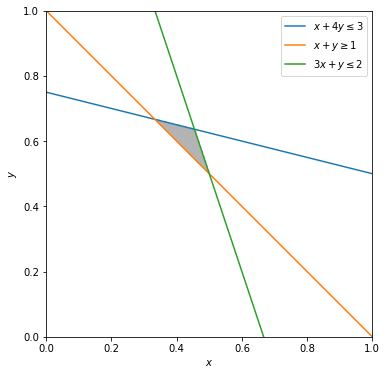

In [11]:
### Initialize the plot.
plt.figure(figsize=(6, 6)) # create an empty figure


### Plot the lines.
# create an array of x values between 0 and 1
x1 = np.linspace(0, 1, num=200) 

# create an array of y values for each of the lines defined by the constraints
y1 = (1/4)*(3-x1)  # x + 4*y = 3
y2 = 1-x1          # x + y = 1
y3 = 2-3*x1        # 3*x + y = 2

# plot all three lines using plt.plot(x,y)
plt.plot(x1, y1, label='$x+4y \leq 3$')
plt.plot(x1, y2, label='$x+y \geq 1$' )
plt.plot(x1, y3, label='$3x+y \leq 2$')


### Plot the feasible region.
# create a grid of x and y values between 0 and 1
x, y = np.meshgrid(x1, x1)

# display data as an image using plt.imshow()
plt.imshow(
    ((x+4*y<=3) & (x+y>=1) & (3*x+y<=2)).astype(int),          # data points for the image
    extent=(x.min(),x.max(),y.min(),y.max()), origin="lower",  # controls the location of the image 
    cmap="Greys", alpha = 0.3)                                 # controls the colour of the image


### Format the graph.
# set the min and max values of x and y along the axes
plt.xlim(0,1); plt.ylim(0,1)

# add axis labels
plt.xlabel('$x$'); plt.ylabel('$y$')

# add the legend on the upper right corner of the graph
plt.legend(loc='upper right')

In [12]:
print(type(x1))

<class 'numpy.ndarray'>


Now, time to try it with the feasible region of the house. Recall that the equation of the four walls of the house is as follows: 
$$
\begin{array}{rlcl}
2x+5y &\leq& 54 \\
8x+y  &\geq& 26\\
y     &\geq& 2\\
2x+y  &\leq& 22
\end{array}
$$

<font color='red'>Hint:</font> To plot the line $y=2$, commands like `y=2` followed by `plt.plot(x,y)` will not work because `x` and `y` are not of the same length. You may use `y=2+0*x` instead.

<font color='red'>Hint:</font> You can use the following maximum and minimum values for x and y along the axes: `plt.xlim(0,11); plt.ylim(0,11)`.

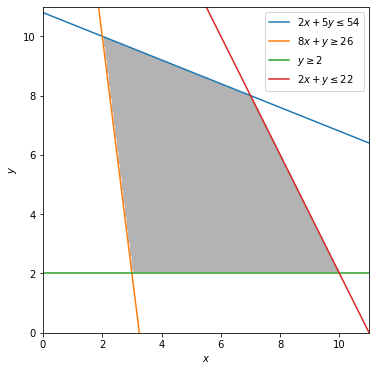

In [17]:
### Initialize the plot
plt.figure(figsize=(6, 6))


### Plot the lines
# Create a list of x values between 0 and 11
x1 = np.linspace(0, 11, num=200)

# Create a list of y values for each of the lines defined by the constraints
y1 = (54-2*x1)/5
y2 = 26-8*x1
y3 = 2-0*x1
y4 = 22-2*x1

# Plot all three lines using plt.plot(x,y)
plt.plot(x1, y1, label='$2x+5y\leq 54$')
plt.plot(x1, y2, label='$8x+y \geq 26$')
plt.plot(x1, y3, label='$y \geq 2$')
plt.plot(x1, y4, label='$2x+y \leq 22$')

### Plot the feasible region
# Create a grid of x and y values between 0 and 1
x, y = np.meshgrid(x1, x1)


# Display data as an image using plt.imshow()
plt.imshow(
    ((2*x+5*y<=54) & (8*x+y>=26) & (y+0*x >= 2) & (2*x+y <= 22)).astype(int),          # data points for the image
    extent=(x.min(),x.max(),y.min(),y.max()), origin="lower",  # controls the location of the image 
    cmap="Greys", alpha = 0.3)   


### Format the graph
# Set the min and max values of x and y along the axes
plt.xlim(0,11); plt.ylim(0,11)

# Add axis labels
plt.xlabel('$x$'); plt.ylabel('$y$')

# Add the legend on the upper right corner of the graph
plt.legend(loc='upper right')

## Exercise 2: the Perfect Breakfast

### Task 1: Model the problem in PuLP. 

Recall that we have modelled the exercise 1 in problem set 1 as:
$$
\begin{array}{rrcrcl}
\text{maximize:}   &   9 x  +  12 y               \\
\text{subject to:} &     x          & \leq & 5,   \\
                   & 200 x  +  50 y & \geq & 400, \\
                   &   6 x  +   7 y & \leq & 42,  \\
                   &     x  ,     y & \geq & 0.   \\
\end{array}
$$

Let's implement it in PuLP. You have already seen and experimented with LPs using PuLP, so there will not be any guidelines this time. What is the objective value (i.e. the optimal amount of protein)? What combinations of cereals A and B should you have to reach it?

In [ ]:
# Try to do it from scratch yourself.



### Task 2: Change a constraint.
Now you already know the basics for solving a linear program in PuLP. It's time to take it to the next level. 

Suppose this morning, you wake up feeling that it's time to spoil yourself and don't want to care how much sugar you take. That is, you'd like to delete the constraint corresponding to sugar. Update your linear program accordingly. 

<font color='red'>Hint:</font> It will be convenient if you don't have to rewrite everything. Fortunately, PuLP has a built-in function called `del`for you to delete certain constraints. It works as `del name_of_lp.constraints['name_of_constraint_to_delete']`.
Try it!


In [ ]:
# Delete the constraint corresponding to sugar. 


Print your LP again to see whether you have succeeded.

In [ ]:
# Print your LP.


Solve the updated linear program. What is the status of the linear program now? Is it optimized, unbounded or infeasible?

In [ ]:
# Solve your LP.


What about other handy tools that you can think of? For example, you may want to change a constraint. Do you have to delete the constraint and then add it again? Or there's some easier ways? Play with PuLP, search the documentation, and discover it! 

As a concrete example, you may want to increase your energy consumed to be at least 1400, while still having the sugar constraint. How can you modify your linear program? Solve it and see what is the status of this LP.

In [ ]:
# Change the constraint of energy from 400 to 1400, solve the LP and decide the type.


In [ ]:
# Play freely in PuLP and try to explore different functions, have fun!
